In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('D:\Learning\Soccer\passes.csv')

In [5]:
data.head()

,game_id;passing_quote;winner
0,11;72;No
1,11;91;Yes
2,12;82;Yes
3,12;86;No
4,13;82;Yes


In [6]:
data = pd.read_csv('D:\Learning\Soccer\passes.csv', delimiter=';')

In [7]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        306 non-null    int64  
 1   passing_quote  304 non-null    float64
 2   winner         304 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ KB


(   game_id  passing_quote winner
 0       11           72.0     No
 1       11           91.0    Yes
 2       12           82.0    Yes
 3       12           86.0     No
 4       13           82.0    Yes,
 None)

In [8]:
data_clean = data.dropna()

data_clean.info()
data_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 305
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        304 non-null    int64  
 1   passing_quote  304 non-null    float64
 2   winner         304 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


,game_id,passing_quote,winner
0,11,72.0,No
1,11,91.0,Yes
2,12,82.0,Yes
3,12,86.0,No
4,13,82.0,Yes


### Question 1

In [15]:
grouped_data = data.groupby(["game_id", "winner"])["passing_quote"].mean().unstack()

In [ ]:
mean_winner_passing_rate = grouped_data["Yes"].mean()
mean_loser_passing_rate = grouped_data["No"].mean()

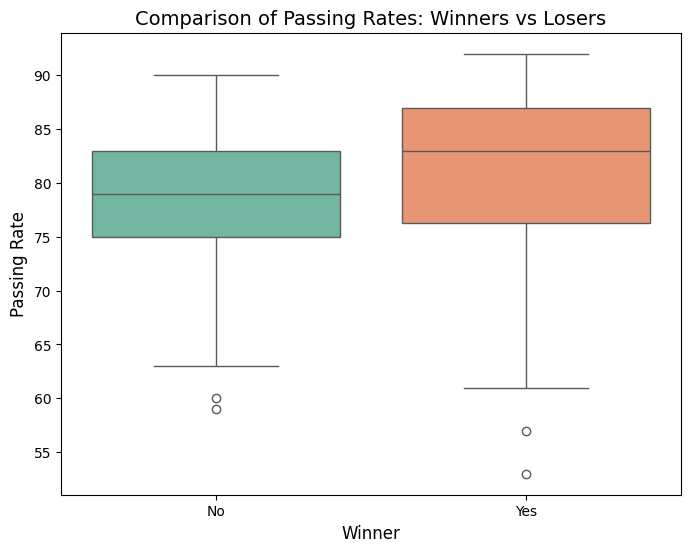

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="winner", y="passing_quote", palette="Set2")
plt.title("Comparison of Passing Rates: Winners vs Losers", fontsize=14)
plt.xlabel("Winner", fontsize=12)
plt.ylabel("Passing Rate", fontsize=12)
plt.show()

### Questions 2

In [16]:
grouped_data["difference"] = grouped_data["Yes"] - grouped_data["No"]

games_with_winner = grouped_data.dropna(subset=["difference"])

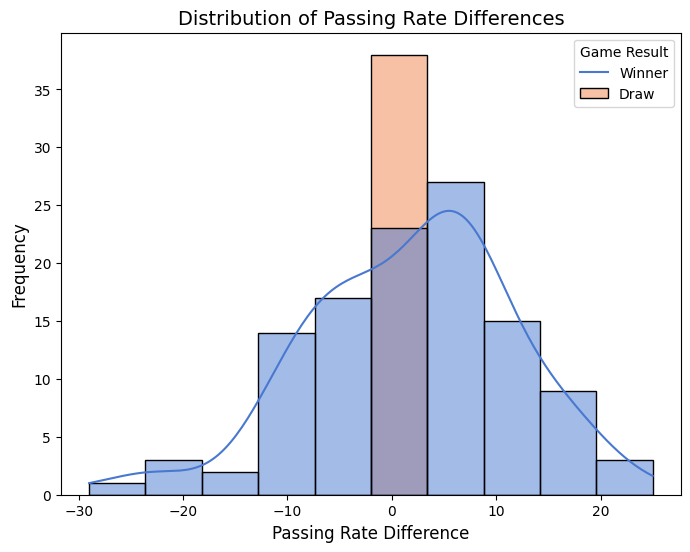

In [15]:
grouped_data = data.groupby(["game_id", "winner"])["passing_quote"].mean().unstack()
grouped_data["difference"] = grouped_data["Yes"] - grouped_data["No"]

grouped_data["is_draw"] = grouped_data["difference"].isnull()
grouped_data["difference"] = grouped_data["difference"].fillna(0)

plt.figure(figsize=(8, 6))
sns.histplot(data=grouped_data, x="difference", hue="is_draw", bins=10, kde=True, palette="muted")
plt.title("Distribution of Passing Rate Differences", fontsize=14)
plt.xlabel("Passing Rate Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Game Result", labels=["Winner", "Draw"])
plt.show()

In [16]:
grouped_data, mean_winner_rate, mean_loser_rate, games_with_winner["difference"].mean()

(winner     No   Yes  difference  is_draw
 game_id                                 
 11       72.0  91.0        19.0    False
 12       86.0  82.0        -4.0    False
 13       79.0  82.0         3.0    False
 14       79.0  77.0        -2.0    False
 15       81.0   NaN         0.0     True
 ...       ...   ...         ...      ...
 175      80.0   NaN         0.0     True
 176      76.0  91.0        15.0    False
 177      78.0  81.0         3.0    False
 178      73.5   NaN         0.0     True
 179      89.0  74.0       -15.0    False
 
 [152 rows x 4 columns],
 np.float64(81.07894736842105),
 np.float64(79.0),
 np.float64(1.8157894736842106))

### Hypothesis Testing

### Question 1 Hypothesis

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

winners = data[data['winner'] == 'Yes']['passing_quote']
losers = data[data['winner'] == 'No']['passing_quote']

stat_winners, p_winners = shapiro(winners)
stat_losers, p_losers = shapiro(losers)

print(f"Shapiro-Wilk Test for Winners: p-value = {p_winners}")
print(f"Shapiro-Wilk Test for Losers: p-value = {p_losers}")

if p_winners > 0.05 and p_losers > 0.05: 
    stat, p_value = ttest_ind(winners, losers, alternative='greater')
    test_type = "Two-Sample t-Test"
else: 
    stat, p_value = mannwhitneyu(winners, losers, alternative='greater')
    test_type = "Mann-Whitney U-Test"

print(f"{test_type} Result: Statistic = {stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Winners have a higher passing rate.")
else:
    print("Fail to reject the null hypothesis: No evidence that winners have a higher passing rate.")


Shapiro-Wilk Test for Winners: p-value = 2.0197121733467638e-06
Shapiro-Wilk Test for Losers: p-value = 0.0007146308719927363
Mann-Whitney U-Test Result: Statistic = 13524.0, p-value = 0.00013921432409865386
Reject the null hypothesis: Winners have a higher passing rate.


### QUestion 2 Hypothesis

In [18]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

grouped_data = data.groupby(["game_id", "winner"])["passing_quote"].mean().unstack()
grouped_data["difference"] = grouped_data["Yes"] - grouped_data["No"]

games_with_winner = grouped_data.dropna(subset=["difference"])["difference"] 
games_with_draw = grouped_data[grouped_data["difference"].isnull()] 
games_with_draw["difference"] = 0 


winner_differences = games_with_winner.values
draw_differences = games_with_draw["difference"].values

stat_winner, p_winner = shapiro(winner_differences)
stat_draw, p_draw = shapiro(draw_differences)

print(f"Shapiro-Wilk Test for Winner Differences: p-value = {p_winner}")
print(f"Shapiro-Wilk Test for Draw Differences: p-value = {p_draw}")

if p_winner > 0.05 and p_draw > 0.05:  
    stat, p_value = ttest_ind(winner_differences, draw_differences, alternative='two-sided')
    test_type = "Two-Sample t-Test"
else: 
    stat, p_value = mannwhitneyu(winner_differences, draw_differences, alternative='two-sided')
    test_type = "Mann-Whitney U-Test"

print(f"{test_type} Result: Statistic = {stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: The differences in passing rates are significantly different.")
else:
    print("Fail to reject the null hypothesis: No evidence of a significant difference in passing rates.")


Shapiro-Wilk Test for Winner Differences: p-value = 0.16984067910424117
Shapiro-Wilk Test for Draw Differences: p-value = 1.0
Two-Sample t-Test Result: Statistic = 1.1294564267318246, p-value = 0.2605083055936165
Fail to reject the null hypothesis: No evidence of a significant difference in passing rates.
